In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
initial_train_data = pd.read_json("~/SageMaker/data/dataset_en_train.json", lines=True)
initial_test_data = pd.read_json("~/SageMaker/data/dataset_en_test.json", lines=True)

In [5]:
initial_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [20]:
initial_train_data.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [21]:
initial_train_data.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

There are no null values in the training data.

Next we can find the number of unique values for the product, reviewers, product category and the language

In [24]:
print("Number of unique products are {0}".format(initial_train_data['product_id'].nunique()))
print("Number of unique reviewers are {0}".format(initial_train_data['reviewer_id'].nunique()))
print("Number of unique categories of the product are are {0}".format(initial_train_data['product_category'].nunique()))

Number of unique products are 185541
Number of unique reviewers are 196745
Number of unique categories of the product are are 31


There are so many different unique reviewers and the unique products which leads to a large dimensional space. 

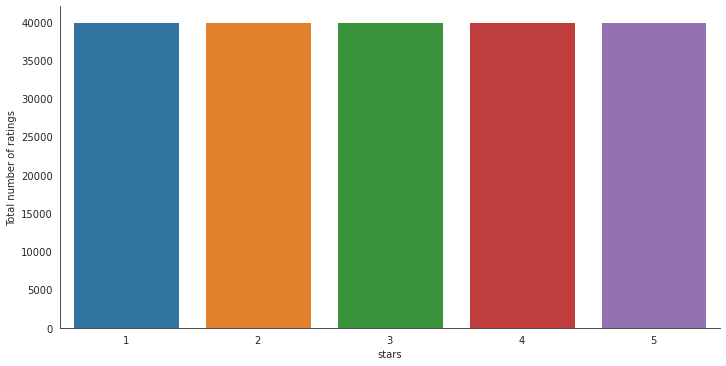

In [41]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot(x="stars", data=initial_train_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [13]:
no_of_rated_products_per_user = initial_train_data.groupby(by='reviewer_id')['stars'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

reviewer_id
reviewer_en_0857640    5
reviewer_en_0648912    4
reviewer_en_0957630    4
reviewer_en_0078203    4
reviewer_en_0447899    4
Name: stars, dtype: int64

In [14]:
no_of_rated_products_per_user.describe()

count    196745.000000
mean          1.016544
std           0.134122
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: stars, dtype: float64

Getting the number of products in each category

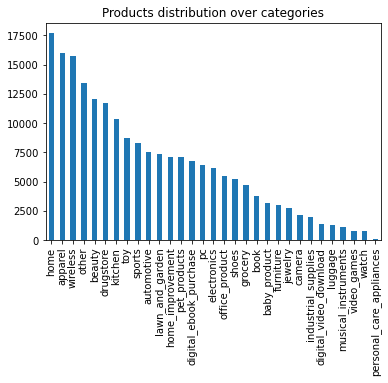

In [45]:
products_data = initial_train_data['product_category'].value_counts().plot(kind='bar', title='Products distribution over categories')

From the above graph we can see that there more number of products under "home" category and less in "personal_care_appliances".

Now we can calculate the mean rating(stars) of each category but we have to be keep in mind that the categories which are having less ratings might skew the values to either side and might not gives us accurate representation.

In [53]:
initial_train_data.groupby('product_category')['stars'].mean().sort_values()

product_category
wireless                    2.726729
video_games                 2.781935
grocery                     2.801903
digital_video_download      2.851906
personal_care_appliances    2.853333
lawn_and_garden             2.866521
electronics                 2.891044
beauty                      2.902407
pc                          2.904234
pet_products                2.931799
watch                       2.939553
furniture                   2.960791
automotive                  2.966294
drugstore                   2.970503
toy                         2.971298
jewelry                     2.995996
industrial_supplies         3.000000
camera                      3.002338
apparel                     3.015736
home_improvement            3.023122
other                       3.024817
home                        3.047684
office_product              3.051983
kitchen                     3.061260
musical_instruments         3.083485
shoes                       3.091976
baby_product         